In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
import os

In [3]:
dataset_path = "C:/Users/shaik/OneDrive/Documents/Uptoskills/colored_images"

In [4]:
batch_size = 32
img_size = (224, 224)

In [5]:
dataset = image_dataset_from_directory(
    dataset_path,
    shuffle=True,
    batch_size=batch_size,
    image_size=img_size
)

Found 3662 files belonging to 5 classes.


In [6]:
# Split into training and validation sets
train_size = int(0.8 * len(dataset))
train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size)

In [7]:
# Define a CNN model (EfficientNetB0 as backbone)
base_model = keras.applications.EfficientNetB0(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the pre-trained model

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [8]:
# Build the classification model
model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(5, activation='softmax')  # 5 classes
])

In [9]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [10]:
epochs = 10
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs
)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 91s 909ms/step - accuracy: 0.6558 - loss: 0.9506 - val_accuracy: 0.7827 - val_loss: 0.6044
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 76s 830ms/step - accuracy: 0.7644 - loss: 0.6441 - val_accuracy: 0.8078 - val_loss: 0.5480
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 82s 891ms/step - accuracy: 0.7722 - loss: 0.5977 - val_accuracy: 0.7994 - val_loss: 0.5582
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 87s 944ms/step - accuracy: 0.7879 - loss: 0.5709 - val_accuracy: 0.7925 - val_loss: 0.5431
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 81s 884ms/step - accuracy: 0.7860 - loss: 0.5541 - val_accuracy: 0.8008 - val_loss: 0.5476
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 80s 873ms/step - accuracy: 0.8103 - loss: 0.5217 - val_accuracy: 0.8008 - val_loss: 0.5474
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 75s 817ms/step - accuracy: 0.7990 - loss: 0.5319 - val_accuracy: 0.8078 - val_loss: 0.5237
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 77s 836ms/step - accuracy: 0.8065 - loss: 0.5095 - val_accu

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,543,412 (17.33 MB)

 Trainable params: 164,613 (643.02 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

 Optimizer params: 329,228 (1.26 MB)

In [12]:
model.save("diabetic_retinopathy_model.h5")

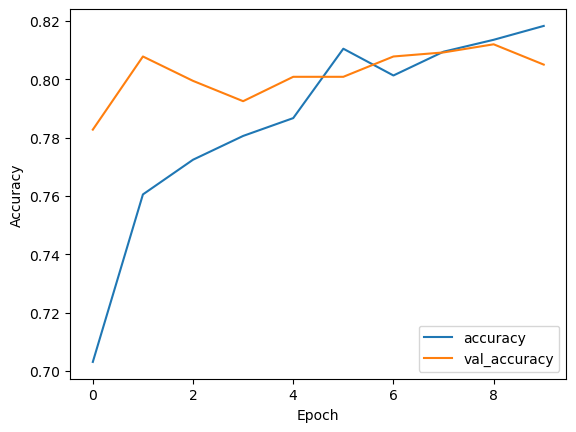

In [13]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()